<a href="https://colab.research.google.com/github/AdrielApX/Modelos-de-predicci-n-con-reporte-de-coeficientes.REPO/blob/main/modelos_de_predicci_n_con_reporte_de_coeficientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración de Datos**

## **Importar las librerias y el dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.read_csv('Housing_Price_Data.csv')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## **Explorar los datos**

In [ ]:
data = pd.read_csv('Housing_Price_Data.csv')
print(data.head())
print(data.info())
print(data.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

## **Identificar y manejar valores faltantes**

In [ ]:
missing_values = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
data_cleaned = data.dropna()

## **Identificar y manejar valores atípicos (outliers)**

> Visualizar outliers


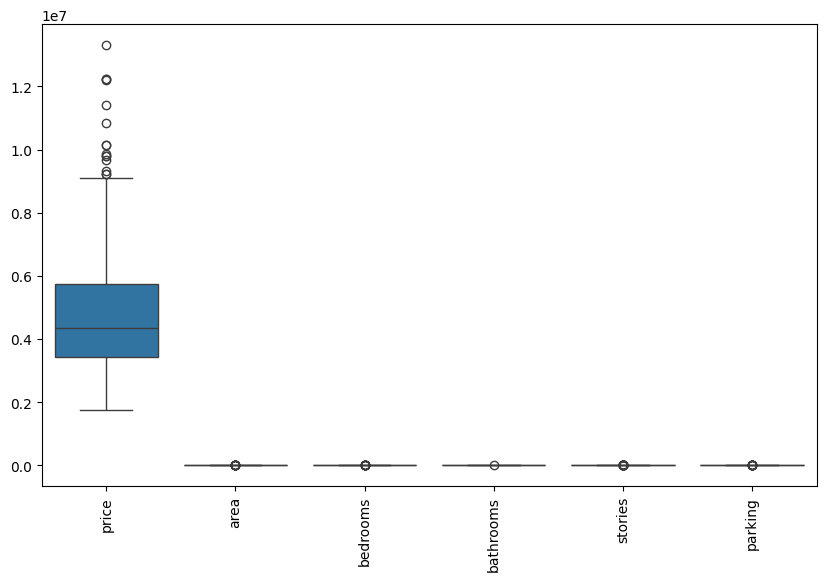

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned)
plt.xticks(rotation=90)
plt.show()

# **Preprocesamiento de Datos**

## **Normalizar o estandarizar las variables**

In [ ]:
#Identificar columnas categóricas
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
print("Columnas categóricas:")
print(categorical_columns)

#Convertir variables categóricas a dummy variables
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

Columnas categóricas:
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
numerical_features = data_cleaned.select_dtypes(include=[np.number]).columns
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

In [ ]:
print("Columnas disponibles en el DataFrame:")
print(data_cleaned.columns)

Columnas disponibles en el DataFrame:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


## **Crear nuevas características si es relevante**

In [ ]:
if 'Area' in data_cleaned.columns:
    data_cleaned['Area_squared'] = data_cleaned['Area'] ** 2

In [ ]:
if 'price' in data_cleaned.columns:
    X = data_cleaned.drop('price', axis=1)
    y = data_cleaned['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise KeyError("La columna 'price' no se encuentra en el DataFrame. Verifica las columnas disponibles.")

# **Análisis de Coeficientes del Modelo**

### **Entrenar el modelo**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Extraer los coeficientes del modelo entrenado**

In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                 Coefficient
area                                0.273778
bedrooms                            0.030296
bathrooms                           0.294009
stories                             0.188984
parking                             0.103570
mainroad_yes                        0.196883
guestroom_yes                       0.123940
basement_yes                        0.208833
hotwaterheating_yes                 0.366373
airconditioning_yes                 0.423512
prefarea_yes                        0.337070
furnishingstatus_semi-furnished    -0.067898
furnishingstatus_unfurnished       -0.221352


### **Predicciones y evaluación del modelo**

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.50236422897849
R-squared: 0.6529242642153175


### **Visualizar las predicciones vs valores reales**

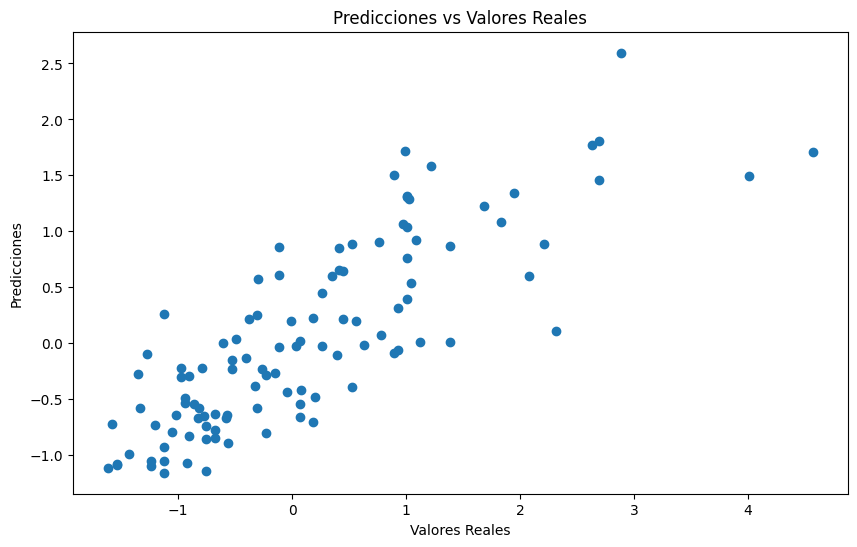

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()